# Correlations

Sourced from [here](https://medium.com/@ktoprakucar/how-to-calculate-the-correlation-between-categorical-and-continuous-values-dcb7abf79406)

In [1]:
import numpy as np
import pandas as pd
import scipy.stats as ss
from scipy.stats.contingency import association

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# https://stackoverflow.com/questions/46498455/categorical-features-correlation/46498792#46498792
def cramers_v(confusion_matrix):
    """ calculate Cramers V statistic for categorial-categorial association.
        uses correction from Bergsma and Wicher,
        Journal of the Korean Statistical Society 42 (2013): 323-328
    """
    chi2_cont = ss.chi2_contingency(confusion_matrix)
    n = confusion_matrix.sum()
    phi2 = chi2_cont[0] / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k - 1) * (r - 1)) / (n - 1))
    rcorr = r - ((r - 1) ** 2) / (n - 1)
    kcorr = k - ((k - 1) ** 2) / (n - 1)
    return np.sqrt(phi2corr / min((kcorr - 1), (rcorr - 1))), chi2_cont[1]

In [3]:
data_df = pd.read_csv("../../data/datasets/PS-LRm-970-Expert/dataset.csv")

In [4]:
data_df = data_df.drop(index=data_df[data_df["dp"] == 2].index)
data_df = data_df.drop(columns=["name", "subject"])
data_df

,af,ip,use,bn,lse,dm,dp,vb,vm
0,4,1,1,0,1,2,0,1,2
1,3,2,1,0,1,2,1,2,2
2,4,1,1,0,1,2,0,2,2
3,4,1,1,0,1,2,0,1,2
4,3,1,1,0,1,2,0,0,3
...,...,...,...,...,...,...,...,...,...
965,4,1,0,0,1,1,0,1,1
966,2,0,1,1,0,0,1,0,0
967,1,0,0,0,0,0,0,0,0
968,4,1,1,0,1,2,0,1,3


In [5]:
corrmat_cramerv = np.zeros((len(data_df.columns), len(data_df.columns)))
corrmat_tschuprow = np.copy(corrmat_cramerv)
corrmat_pearson = np.copy(corrmat_cramerv)

In [6]:
for i, tag_i in enumerate(data_df.columns):
    for j, tag_j in enumerate(data_df.columns):
            act_conf_mat = pd.crosstab(data_df[tag_i], data_df[tag_j])
            corrmat_cramerv[i][j] = association(act_conf_mat, method="cramer")
            corrmat_tschuprow[i][j] = association(act_conf_mat, method="tschuprow")
            corrmat_pearson[i][j] = association(act_conf_mat, method="pearson")

In [33]:
def confusion_matrix_plot(cm, names, savepath = None, show = True, figsize = (8,8)):
    fig = plt.figure(figsize=figsize)

    sns.heatmap(cm, annot=True, xticklabels=names, yticklabels=names)
    plt.xlabel("")
    plt.ylabel("")

    plt.tight_layout()
    if savepath is not None:
        plt.savefig(savepath, format="pdf", bbox_inches="tight")
    if show:
        plt.show()

    plt.close(fig)

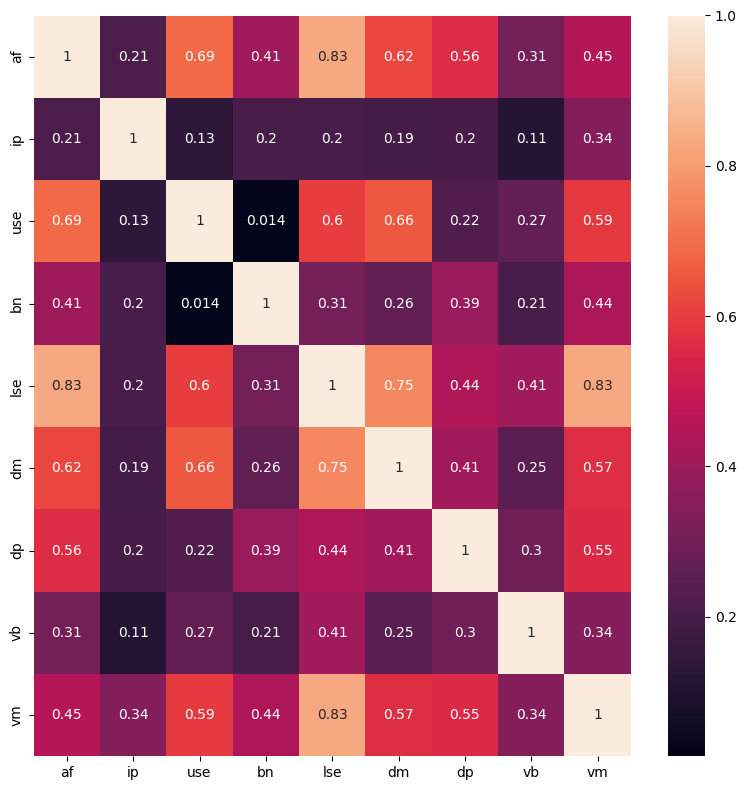

In [34]:
confusion_matrix_plot(corrmat_cramerv, data_df.columns, savepath="./assoc_plot_cramersv.pdf", show=True)

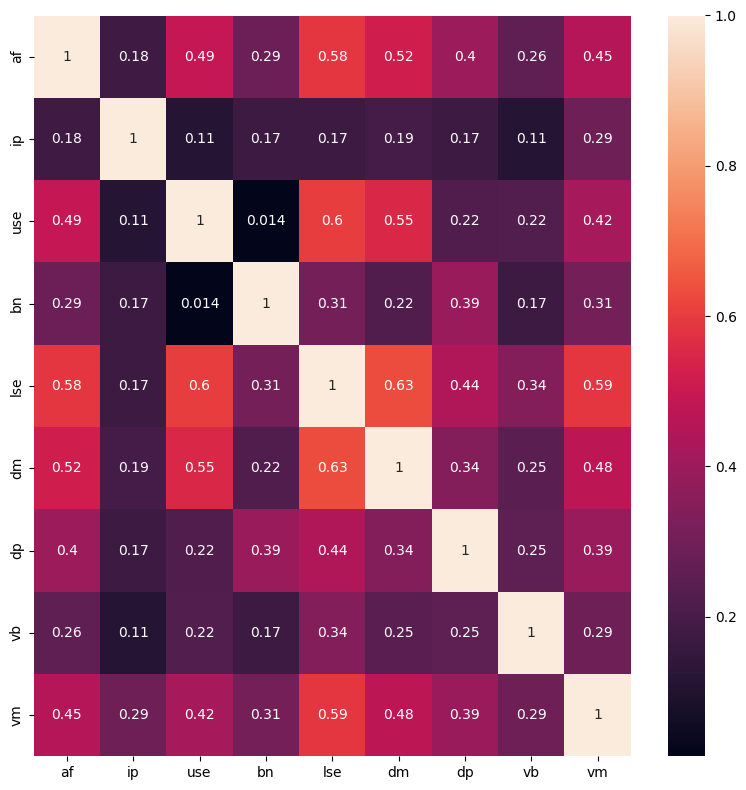

In [65]:
confusion_matrix_plot(corrmat_tschuprow, data_df.columns, savepath="./assoc_plot_tschuprow.pdf", show=True)

In [62]:
corrmat_cramerv

array([[1.        , 0.21115575, 0.69141138, 0.40593211, 0.82729873,
        0.62017051, 0.56175374, 0.3062576 , 0.4502875 ],
       [0.21115575, 1.        , 0.13406349, 0.20405578, 0.20441969,
        0.19427119, 0.20072265, 0.11332811, 0.34244788],
       [0.69141138, 0.13406349, 1.        , 0.01399818, 0.60250187,
        0.6565473 , 0.22185005, 0.26697662, 0.59293952],
       [0.40593211, 0.20405578, 0.01399818, 1.        , 0.31005418,
        0.26143065, 0.39409754, 0.20531805, 0.43609698],
       [0.82729873, 0.20441969, 0.60250187, 0.31005418, 1.        ,
        0.7538649 , 0.43882156, 0.40852208, 0.8306852 ],
       [0.62017051, 0.19427119, 0.6565473 , 0.26143065, 0.7538649 ,
        1.        , 0.4092996 , 0.24640035, 0.56601334],
       [0.56175374, 0.20072265, 0.22185005, 0.39409754, 0.43882156,
        0.4092996 , 1.        , 0.30173676, 0.55359918],
       [0.3062576 , 0.11332811, 0.26697662, 0.20531805, 0.40852208,
        0.24640035, 0.30173676, 1.        , 0.3437466 ],


In [30]:
def get_top_corrs(data, names):
    for idx, name in enumerate(names):
        sorted_names = names[np.argsort(-data[idx])]
        sorted_nums  = -np.sort(-data[idx])
        print(f"For {name}: ")
        print(sorted_names)
        print(sorted_nums)

In [36]:
data_df.columns

Index(['af', 'ip', 'use', 'bn', 'lse', 'dm', 'dp', 'vb', 'vm'], dtype='object')

In [31]:
get_top_corrs(corrmat_cramerv, data_df.columns)

For af: 
Index(['af', 'lse', 'use', 'dm', 'dp', 'vm', 'bn', 'vb', 'ip'], dtype='object')
[1.         0.82729873 0.69141138 0.62017051 0.56175374 0.4502875
 0.40593211 0.3062576  0.21115575]
For ip: 
Index(['ip', 'vm', 'af', 'lse', 'bn', 'dp', 'dm', 'use', 'vb'], dtype='object')
[1.         0.34244788 0.21115575 0.20441969 0.20405578 0.20072265
 0.19427119 0.13406349 0.11332811]
For use: 
Index(['use', 'af', 'dm', 'lse', 'vm', 'vb', 'dp', 'ip', 'bn'], dtype='object')
[1.         0.69141138 0.6565473  0.60250187 0.59293952 0.26697662
 0.22185005 0.13406349 0.01399818]
For bn: 
Index(['bn', 'vm', 'af', 'dp', 'lse', 'dm', 'vb', 'ip', 'use'], dtype='object')
[1.         0.43609698 0.40593211 0.39409754 0.31005418 0.26143065
 0.20531805 0.20405578 0.01399818]
For lse: 
Index(['lse', 'vm', 'af', 'dm', 'use', 'dp', 'vb', 'bn', 'ip'], dtype='object')
[1.         0.8306852  0.82729873 0.7538649  0.60250187 0.43882156
 0.40852208 0.31005418 0.20441969]
For dm: 
Index(['dm', 'lse', 'use', 'af', 'v

In [35]:
get_top_corrs(corrmat_tschuprow, data_df.columns)

For af: 
Index(['af', 'lse', 'dm', 'use', 'vm', 'dp', 'bn', 'vb', 'ip'], dtype='object')
[1.         0.58498854 0.52149916 0.48890168 0.4502875  0.39721988
 0.28703734 0.25753092 0.17756011]
For ip: 
Index(['ip', 'vm', 'dm', 'af', 'lse', 'bn', 'dp', 'vb', 'use'], dtype='object')
[1.         0.2879632  0.19427119 0.17756011 0.17189579 0.17158977
 0.16878696 0.11332811 0.11273351]
For use: 
Index(['use', 'lse', 'dm', 'af', 'vm', 'vb', 'dp', 'ip', 'bn'], dtype='object')
[1.         0.60250187 0.55208827 0.48890168 0.41927155 0.22449969
 0.22185005 0.11273351 0.01399818]
For bn: 
Index(['bn', 'dp', 'lse', 'vm', 'af', 'dm', 'vb', 'ip', 'use'], dtype='object')
[1.         0.39409754 0.31005418 0.30836713 0.28703734 0.21983609
 0.17265122 0.17158977 0.01399818]
For lse: 
Index(['lse', 'dm', 'use', 'vm', 'af', 'dp', 'vb', 'bn', 'ip'], dtype='object')
[1.         0.63392229 0.60250187 0.58738313 0.58498854 0.43882156
 0.34352475 0.31005418 0.17189579]
For dm: 
Index(['dm', 'lse', 'use', 'af', '